100%|█████████████████████████████████████████████████████████████████████████████| 11.1k/11.1k [00:00<00:00, 3.42MB/s]

Extracting files...
Loaded 1030 rows.


Training Strength Model...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step 
Model R² Score: 0.8528


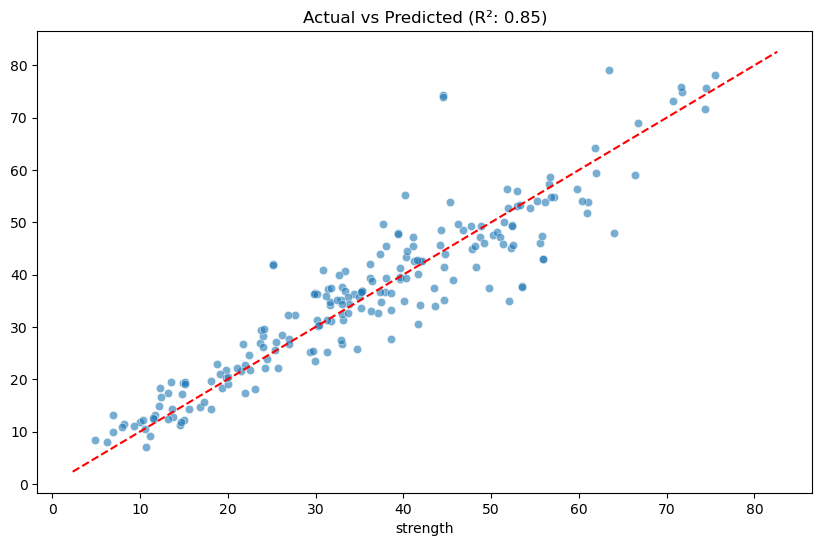

✅ Model saved to 'strength_model.keras'
✅ Scaler saved to 'scaler.pkl' (Required for the App)


In [1]:
# ==========================================
# 🏗️ Notebook 1: Concrete Strength Prediction (ANN)
# ==========================================

# 1. Install Dependencies
!pip install kagglehub pandas matplotlib seaborn scikit-learn tensorflow

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import pickle # To save the scaler for the app
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# --- 2. Data Loading ---
print("Downloading UCI Concrete Dataset...")
path = kagglehub.dataset_download("elikplim/concrete-compressive-strength-data-set")

# Find CSV
csv_files = glob.glob(os.path.join(path, "**", "*.csv"), recursive=True)
df = pd.read_csv(csv_files[0])

# Clean Column Names
df.columns = ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 
              'coarse_agg', 'fine_agg', 'age', 'strength']
print(f"Loaded {len(df)} rows.")

# --- 3. Preprocessing ---
X = df.drop('strength', axis=1)
y = df['strength']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Model Training ---
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Training Strength Model...")
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=150, batch_size=32, verbose=0)

# --- 5. Evaluation ---
preds = model.predict(X_test_scaled).flatten()
r2 = r2_score(y_test, preds)
print(f"Model R² Score: {r2:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title(f'Actual vs Predicted (R²: {r2:.2f})')
plt.show()

# --- 6. Save Artifacts for App ---
model.save('strength_model.keras')
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Model saved to 'strength_model.keras'")
print("✅ Scaler saved to 'scaler.pkl' (Required for the App)")